<a href="https://colab.research.google.com/github/prasanth-balaraman-engineer/inside-deep-learning/blob/main/01_the_mechanics_of_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import torch

In [2]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8]])
torch_tensor3d = torch.tensor([
    [[1, 2, 3], [4, 5, 6]],
    [[7, 8, 9], [10, 11, 12]],
    [[13, 14, 15], [16, 17, 18]],
    [[19, 20, 21], [22, 23, 24]],
])

In [3]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [4]:
x_np = np.random.random((4, 4))
x_pt = torch.tensor(x_np)

print(x_np.dtype, x_pt.dtype)
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float64 torch.float64
float32 torch.float32


In [5]:
b_np = x_np > 0.5
print(b_np)
print(b_np.dtype)

[[False  True  True  True]
 [False  True False False]
 [ True  True  True False]
 [False  True  True False]]
bool


In [6]:
b_pt = x_pt > 0.5
print(b_pt)
print(b_pt.dtype)

tensor([[False,  True,  True,  True],
        [False,  True, False, False],
        [ True,  True,  True, False],
        [False,  True,  True, False]])
torch.bool


In [7]:
np.sum(x_np)

9.864393

In [8]:
torch.sum(x_pt)

tensor(9.8644)

In [9]:
print(torch_tensor3d.shape)
print(np.transpose(torch_tensor3d).shape)
print(torch.transpose(torch_tensor3d, 0, 2).shape)

torch.Size([4, 2, 3])
torch.Size([3, 2, 4])
torch.Size([3, 2, 4])


In [10]:
import timeit

x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit(stmt='x@x', globals=globals(), number=100)
time_cpu

29.340017571999994

In [11]:
print(f'Is CUDA available?: {torch.cuda.is_available()}')

Is CUDA available?: True


In [12]:
device = torch.device('cuda')
x = x.to(device)
time_gpu = timeit.timeit(stmt='x@x', globals=globals(), number=100)
time_gpu

2.774572860999996

In [13]:
x = torch.rand(2**11, 2**11, dtype=torch.float64)
time_cpu_64 = timeit.timeit(stmt='x@x', globals=globals(), number=100)
time_cpu_64

49.377279857000005

In [14]:
x = torch.rand(2**11, 2**11, dtype=torch.float64)
x = x.to(device)
time_gpu_64 = timeit.timeit(stmt='x@x', globals=globals(), number=100)
time_gpu_64

0.01315939599999183

In [15]:
x = torch.rand(128, 128).to(device)
y = torch.rand(128, 128)
x @ y

RuntimeError: ignored

In [16]:
x.numpy()

TypeError: ignored

In [17]:
x.cpu().numpy()

array([[0.29237205, 0.5031258 , 0.11255705, ..., 0.90324545, 0.3135907 ,
        0.6324351 ],
       [0.1664446 , 0.5480563 , 0.25375223, ..., 0.03509629, 0.42290944,
        0.58856064],
       [0.46692318, 0.27654767, 0.62668294, ..., 0.6263242 , 0.62815577,
        0.6826137 ],
       ...,
       [0.527891  , 0.7501106 , 0.5298832 , ..., 0.02728897, 0.828868  ,
        0.8734382 ],
       [0.12213916, 0.8798388 , 0.19583625, ..., 0.24426585, 0.62336683,
        0.5066739 ],
       [0.3959874 , 0.5229944 , 0.95565134, ..., 0.71351653, 0.2586487 ,
        0.3407945 ]], dtype=float32)

In [18]:
def move_to(obj, device):
  if isinstance(obj, list):
    return [move_to(i, device) for i in obj]
  elif isinstance(obj, tuple):
    return tuple(list(obj), device)
  elif isinstance(obj, set):
    return set(list(obj), device)
  elif isinstance(obj, dict):
    result = dict()
    for key, value in obj.items():
      result[move_to(key, device)] = move_to(value, device)
    return result
  elif hasattr(obj, 'to'):
    return obj.to(device)
  else:
    return obj

some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(move_to(some_tensors, device))

[tensor(1), tensor(2)]
[tensor(1, device='cuda:0'), tensor(2, device='cuda:0')]


<Axes: >

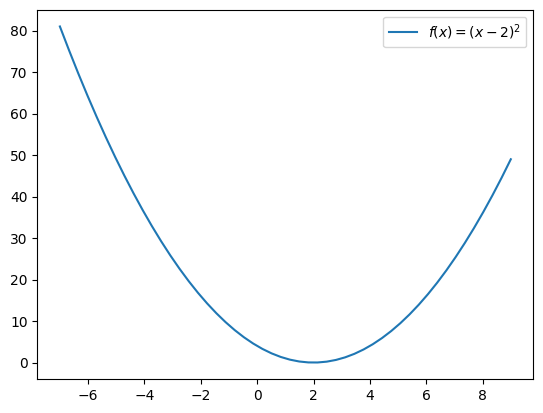

In [19]:
def f(x):
  return torch.pow(x - 2.0, 2)

x = np.linspace(-7, 9)
y = f(torch.tensor(x)).numpy()

sns.lineplot(x=x, y=y, label='$f(x)=(x-2)^2$')

<Axes: >

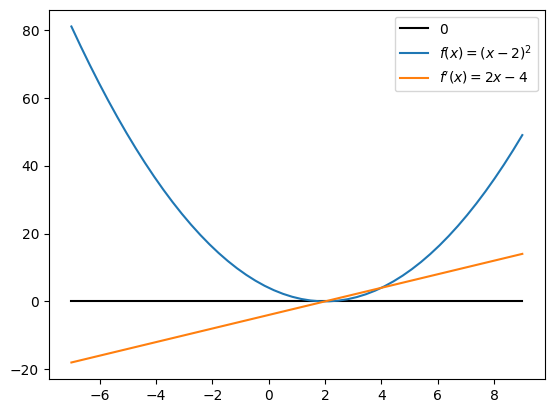

In [20]:
def f_p(x):
  return 2.0 * x - 4

y_p = f_p(x)

sns.lineplot(x=x, y=[0.0]*len(x), label='0', color='black')
sns.lineplot(x=x, y=y, label='$f(x)=(x-2)^2$')
sns.lineplot(x=x, y=y_p, label="$f'(x)=2x-4$")

In [28]:
x = torch.tensor([-3.5])
print(x)

tensor([-3.5000])


In [29]:
y = f(x)
print(y)

tensor([30.2500])


In [30]:
print(x.grad)

None


In [31]:
y.backward()

RuntimeError: ignored

In [34]:
x = torch.tensor([-3.5], requires_grad=True)
print(x)

tensor([-3.5000], requires_grad=True)


In [35]:
y = f(x)
print(y)

tensor([30.2500], grad_fn=<PowBackward0>)


In [36]:
y.backward()

In [37]:
print(x.grad)

tensor([-11.])


In [51]:
x = torch.tensor([-3.5], requires_grad=True)

x_curr = x.clone()
x_prev = x_curr.clone() * 100

epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_curr - x_prev) > epsilon:
  x_prev = x_curr.clone()

  y = f(x)
  y.backward()
  x.data = x.data - eta * x.grad
  x.grad.zero_()
  x_curr = x.data

  print(x_curr)

tensor([-2.4000])
tensor([-1.5200])
tensor([-0.8160])
tensor([-0.2528])
tensor([0.1978])
tensor([0.5582])
tensor([0.8466])
tensor([1.0773])
tensor([1.2618])
tensor([1.4094])
tensor([1.5276])
tensor([1.6220])
tensor([1.6976])
tensor([1.7581])
tensor([1.8065])
tensor([1.8452])
tensor([1.8762])
tensor([1.9009])
tensor([1.9207])
tensor([1.9366])
tensor([1.9493])
tensor([1.9594])
tensor([1.9675])
tensor([1.9740])
tensor([1.9792])
tensor([1.9834])
tensor([1.9867])
tensor([1.9894])
tensor([1.9915])
tensor([1.9932])
tensor([1.9946])
tensor([1.9956])
tensor([1.9965])
tensor([1.9972])
tensor([1.9978])
tensor([1.9982])
tensor([1.9986])
tensor([1.9989])
tensor([1.9991])
tensor([1.9993])
tensor([1.9994])
tensor([1.9995])
tensor([1.9996])
tensor([1.9997])
tensor([1.9998])
tensor([1.9998])
tensor([1.9998])
tensor([1.9999])
tensor([1.9999])
tensor([1.9999])
tensor([1.9999])
tensor([1.9999])
tensor([2.0000])
tensor([2.0000])


In [63]:
x = torch.tensor([3.5])
x_param = torch.nn.Parameter(data=x, requires_grad=True)
optimizer = torch.optim.SGD(params=[x_param], lr=eta)

epochs = 60
for i in range(epochs):
  optimizer.zero_grad()
  loss = f(x_param)
  loss.backward()
  optimizer.step()

print(x_param.data)

tensor([2.0000])


In [65]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [78]:
from torch.utils.data import Dataset

class SimpleDataset(Dataset):
  def __init__(self, X, y):
    super(SimpleDataset, self).__init__()
    self.X = X
    self.y = y

  def __getitem__(self, index):
    inputs = torch.tensor(self.X.values[index], dtype=torch.float32)
    targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
    return inputs, targets

  def __len__(self):
    return self.X.values.shape[0]

dataset = SimpleDataset(X, y)

print(f'Dataset size: {len(dataset)}')
image, label = dataset[0]
print(f'Features shape: {image.shape}')
print(f'Label: {label}')

Dataset size: 70000
Features shape: torch.Size([784])
Label: 5


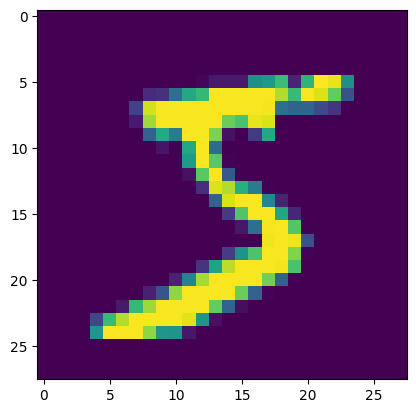

In [79]:
plt.imshow(image.reshape((28, 28)))

In [84]:
from torch.utils.data import random_split

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset=dataset, lengths=(train_size, test_size))
print(f'{len(train_dataset)} examples for training and {len(test_dataset)} examples for test')

56000 examples for training and 14000 examples for test


In [97]:
torch_tensor3d = torch.tensor(torch_tensor3d, dtype=torch.float32)
torch_tensor3d

<ipython-input-97-93fee1796305>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_tensor3d = torch.tensor(torch_tensor3d, dtype=torch.float32)


tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.],
         [10., 11., 12.]],

        [[13., 14., 15.],
         [16., 17., 18.]],

        [[19., 20., 21.],
         [22., 23., 24.]]])

In [98]:
dim1_size, dim2_size, dim3_size = list(torch_tensor3d.shape)

sum = 0
count = 0

for i in range(dim1_size):
  for j in range(dim2_size):
    for k in range(dim3_size):
      sum += torch_tensor3d[i][j][k]
      count += 1

print(sum)
print(count)
print(sum/count)

tensor(300.)
24
tensor(12.5000)


In [100]:
torch.sum(torch_tensor3d)

tensor(300.)

In [101]:
torch.mean(torch_tensor3d)

tensor(12.5000)

In [105]:
torch_tensor3d[2][0][0]

tensor(13.)

<Axes: >

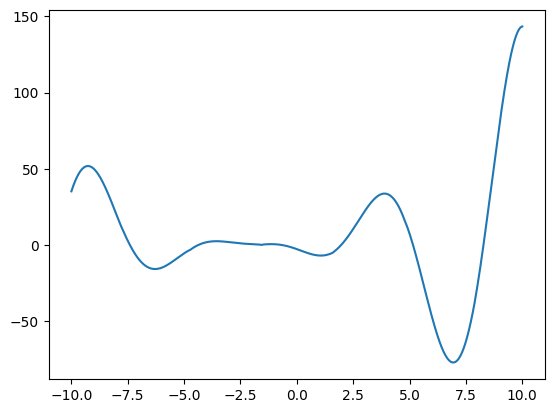

In [122]:
def f(x):
  return torch.sin(x - 2.0) * torch.pow(x + 2.0, 2) + torch.sqrt(torch.abs(torch.cos(x)))

x = np.linspace(-10, 10, 10000)
y = f(torch.tensor(x)).numpy()

sns.lineplot(x=x, y=y)

In [145]:
eta = 0.01
epochs = 10

x = torch.tensor(5.0, requires_grad=True)

for i in range(epochs):
  loss = f(x)
  loss.backward()
  print(f'x: {x.data:25}, x.grad: {x.grad:25}, update: {(eta * x.grad):25}, updated x: {(x.data - eta * x.grad):25}')
  x.data = x.data - eta * x.grad
  x.grad.zero_()

x:                       5.0, x.grad:        -45.63372039794922, update:      -0.45633718371391296, updated x:         5.456336975097656
x:         5.456336975097656, x.grad:        -57.03529357910156, update:       -0.5703529119491577, updated x:        6.0266900062561035
x:        6.0266900062561035, x.grad:       -53.092525482177734, update:       -0.5309252142906189, updated x:         6.557615280151367
x:         6.557615280151367, x.grad:       -28.338058471679688, update:      -0.28338056802749634, updated x:         6.840995788574219
x:         6.840995788574219, x.grad:        -7.798667907714844, update:      -0.07798667997121811, updated x:          6.91898250579834
x:          6.91898250579834, x.grad:       -1.4721527099609375, update:     -0.014721526764333248, updated x:         6.933703899383545
x:         6.933703899383545, x.grad:       -0.2515144348144531, update:     -0.002515144180506468, updated x:         6.936219215393066
x:         6.936219215393066, x.grad:    

In [146]:
x_param = torch.nn.Parameter(torch.tensor(5.0), requires_grad=True)
optimizer = torch.optim.SGD(params=[x_param], lr=eta)

for i in range(epochs):
  optimizer.zero_grad()
  loss = f(x_param)
  loss.backward()
  optimizer.step()

print(x_param.data)

tensor(6.9367)


<ipython-input-183-432a763e329e>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (np.exp(np.sin(x)**2) / ((x - y)**2)) + ((x - y)**2)


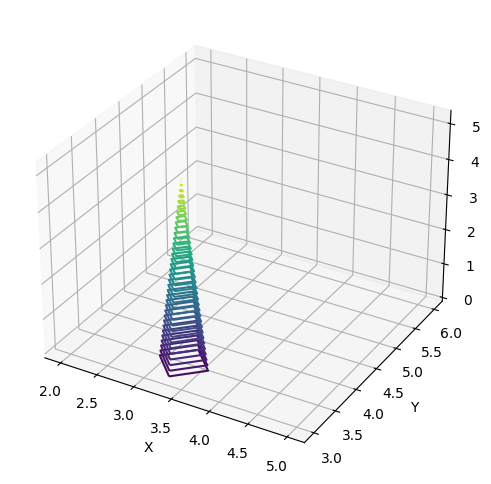

In [183]:
def f_np(x, y):
  return (np.exp(np.sin(x)**2) / ((x - y)**2)) + ((x - y)**2)

x = np.linspace(2, 5, 10)
y = np.linspace(3, 6, 10)
X, Y = np.meshgrid(x, y)
Z = f_np(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [179]:
def f(x, y):
  return (torch.exp(torch.pow(torch.sin(x), 2)) / torch.pow(x - y, 2)) + torch.pow(x - y, 2)

eta = 0.1
epochs = 100

x_param = torch.nn.Parameter(torch.tensor(0.2), requires_grad=True)
y_param = torch.nn.Parameter(torch.tensor(10.0), requires_grad=True)
optimizer = torch.optim.SGD(params=[x_param, y_param], lr=eta)

for i in range(epochs):
  optimizer.zero_grad()
  loss = f(x_param, y_param)
  loss.backward()
  optimizer.step()

print(x_param.data)
print(y_param.data)

tensor(3.1419)
tensor(4.1419)


In [180]:
x = torch.tensor(0.2, requires_grad=True)
y = torch.tensor(10.0, requires_grad=True)

for i in range(epochs):
  loss = f(x, y)
  loss.backward()
  print(f'x: {x.data:25}, updated x: {(x.data - eta * x.grad):25}, y: {y.data:25}, updated y: {(y.data - eta * y.grad):25}')
  x.data = x.data - eta * x.grad
  y.data = y.data - eta * y.grad
  x.grad.zero_()
  y.grad.zero_()

x:       0.20000000298023224, updated x:        2.1593573093414307, y:                      10.0, updated y:         8.040221214294434
x:        2.1593573093414307, updated x:         3.338899612426758, y:         8.040221214294434, updated y:        6.8660125732421875
x:         3.338899612426758, updated x:         4.036374092102051, y:        6.8660125732421875, updated y:        6.1653265953063965
x:         4.036374092102051, updated x:         4.384496212005615, y:        6.1653265953063965, updated y:         5.777625560760498
x:         4.384496212005615, updated x:         4.404868125915527, y:         5.777625560760498, updated y:         5.680261611938477
x:         4.404868125915527, updated x:         4.332855701446533, y:         5.680261611938477, updated y:        5.6642937660217285
x:         4.332855701446533, updated x:        4.3063507080078125, y:        5.6642937660217285, updated y:         5.598799705505371
x:        4.3063507080078125, updated x:         4.2483